In [5]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.python.keras as keras
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig = plt.figure(figsize=(6.5, 6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
(X1,y1),(X2,y2)=tf.keras.datasets.fashion_mnist.load_data()
print('Training set:',X1.shape,X1.dtype)
print('Test set:    ',X2.shape,X2.dtype)


Training set: (60000, 28, 28) uint8
Test set:     (10000, 28, 28) uint8


In [6]:
idx=rd.permutation(X1.shape[0])
X1=X1[idx]
y1=y1[idx]

(10000,)
(10000,)


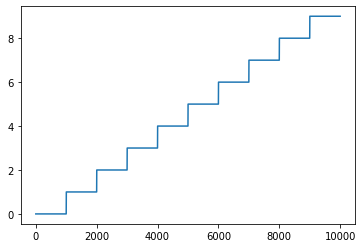

In [7]:
print(y2.shape)
idx=np.argsort(y2)
y2=y2[idx]
X2=X2[idx]
plt.plot(y2)
print(y2.shape)


In [9]:
X1=X1.reshape((60000,28**2))*1.
X2=X2.reshape((X2.shape[0],28**2))*1.
print('Training set:',X1.shape,X1.dtype)
print('Test set:    ',X2.shape,X2.dtype)

Training set: (60000, 784) float64
Test set:     (10000, 784) float64


In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9,whiten=True).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)
print('Nº of Principal Components kept: %d'%X1p.shape[1])

Nº of Principal Components kept: 84


In [11]:
mlp = keras.Sequential()
mlp.add(keras.layers.Dense(20, activation='relu', input_shape=(136,)))
mlp.add(keras.layers.Dense(10, activation='softmax'))

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Y1a = keras.utils.to_categorical(y1a)


In [ ]:
Y1a.shape

In [ ]:
y1a[:5]

In [ ]:
Y1a[:5]

In [ ]:
mlp.train